<a href="https://colab.research.google.com/github/axgervais/AI-Python/blob/main/Projet_classif_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Étape 1 : Compréhension et Exploration des Données


In [ ]:
import pandas as pd

# Chargement des données
data = pd.read_csv('/content/loan_data.csv')

# Affichage des premières lignes pour une vue d'ensemble
print(data.head())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [ ]:
# Informations générales sur le dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB
None


In [ ]:
# Statistiques descriptives
print(data.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       981.000000         981.000000  954.000000        961.000000   
mean       5179.795107        1601.916330  142.511530        342.201873   
std        5695.104533        2718.772806   77.421743         65.100602   
min           0.000000           0.000000    9.000000          6.000000   
25%        2875.000000           0.000000  100.000000        360.000000   
50%        3800.000000        1110.000000  126.000000        360.000000   
75%        5516.000000        2365.000000  162.000000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      902.000000  
mean         0.835920  
std          0.370553  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


Étape 2 : Prétraitement des Données


In [ ]:
# Vérification des valeurs manquantes
print(data.isnull().sum())


Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64


In [ ]:
# Séparer les colonnes numériques et catégorielles
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Remplacer les valeurs manquantes des colonnes numériques par la moyenne
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Remplacer les valeurs manquantes des colonnes catégorielles par le mode
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Vérification des valeurs manquantes après traitement
print(data.isnull().sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<ipython-input-5-3f5eff5ff549>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


Étape 3 : Division des Données en Ensembles d’Entraînement et de Test.

In [ ]:
# Supposons que la colonne cible s'appelle 'target' (à remplacer par le nom exact de la colonne cible si différent)
X = data.drop(['Loan_Status','Loan_ID'], axis=1)
y = data['Loan_Status']


In [ ]:
# Encodage One-Hot pour les variables catégorielles
# Exclude 'Loan_Status' from categorical_cols since it's the target variable
categorical_cols = [col for col in categorical_cols if col != 'Loan_Status']
categorical_cols = [col for col in categorical_cols if col != 'Loan_ID']
data = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [ ]:
# Aperçu des premières lignes après prétraitement
print(data.head())


   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0   142.51153             360.0   
1             4583             1508.0   128.00000             360.0   
2             3000                0.0    66.00000             360.0   
3             2583             2358.0   120.00000             360.0   
4             6000                0.0   141.00000             360.0   

   Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
0             1.0         True        False         False         False   
1             1.0         True         True          True         False   
2             1.0         True         True         False         False   
3             1.0         True         True         False         False   
4             1.0         True        False         False         False   

   Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
0          False                   False              False

In [ ]:
from sklearn.model_selection import train_test_split

# Division avec un ratio de 80% pour l’entraînement et 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2)


In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.00000,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.00000,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.00000,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.00000,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.00000,Urban
...,...,...,...,...,...,...,...,...,...,...,...
976,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.00000,360.0,1.00000,Urban
977,Male,Yes,0,Graduate,No,4158,709.0,115.00000,360.0,1.00000,Urban
978,Male,No,0,Graduate,No,3250,1993.0,126.00000,360.0,0.83592,Semiurban
979,Male,Yes,0,Graduate,No,5000,2393.0,158.00000,360.0,1.00000,Rural


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

# Assuming your categorical features are 'Gender', 'Married', 'Dependents', etc.
# and numerical features are 'LoanAmount', 'ApplicantIncome', etc.
# Adjust these lists based on your actual data.
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


# Create a ColumnTransformer to apply different preprocessing to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols), # Using OneHotEncoder for categorical features
    ])

# Fit and transform the training data
X_train = preprocessor.fit_transform(X_train)

# Transform the test data using the fitted preprocessor
X_test = preprocessor.transform(X_test)

Étape 4 : Choix et Entraînement des Modèles de Classification.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Initialisation des modèles avec des hyperparamètres par défaut
logistic_model = LogisticRegression(random_state=2)
knn_model = KNeighborsClassifier()
random_forest_model = RandomForestClassifier(random_state=2)


In [ ]:
# Entraînement de la régression logistique
logistic_model.fit(X_train, y_train)

# Entraînement du k-nearest neighbors
knn_model.fit(X_train, y_train)

# Entraînement de la forêt aléatoire
random_forest_model.fit(X_train, y_train)


RandomForestClassifier(random_state=2)

In [ ]:
# Évaluation de la régression logistique
logistic_score = logistic_model.score(X_train, y_train)
print("Score de la régression logistique sur l'ensemble d'entraînement :", logistic_score)

# Évaluation du k-nearest neighbors
knn_score = knn_model.score(X_train, y_train)
print("Score du KNN sur l'ensemble d'entraînement :", knn_score)

# Évaluation de la forêt aléatoire
rf_score = random_forest_model.score(X_train, y_train)
print("Score de la forêt aléatoire sur l'ensemble d'entraînement :", rf_score)


Score de la régression logistique sur l'ensemble d'entraînement : 0.8201530612244898
Score du KNN sur l'ensemble d'entraînement : 0.8494897959183674
Score de la forêt aléatoire sur l'ensemble d'entraînement : 1.0


Étape 5 : Évaluation des Modèles

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
# Prédictions sur l'ensemble de test pour chaque modèle
y_pred_logistic = logistic_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)

# Calcul des métriques pour la régression logistique
print("Régression Logistique:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Precision:", precision_score(y_test, y_pred_logistic, pos_label='Y')) # Specify pos_label as 'Y'
print("Recall:", recall_score(y_test, y_pred_logistic, pos_label='Y')) # Specify pos_label as 'Y'
print("F1 Score:", f1_score(y_test, y_pred_logistic, pos_label='Y')) # Specify pos_label as 'Y'
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))

# Calcul des métriques pour KNN
print("\nK-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, pos_label='Y')) # Specify pos_label as 'Y'
print("Recall:", recall_score(y_test, y_pred_knn, pos_label='Y')) # Specify pos_label as 'Y'
print("F1 Score:", f1_score(y_test, y_pred_knn, pos_label='Y')) # Specify pos_label as 'Y'
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# Calcul des métriques pour la forêt aléatoire
print("\nForêt Aléatoire:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, pos_label='Y')) # Specify pos_label as 'Y'
print("Recall:", recall_score(y_test, y_pred_rf, pos_label='Y')) # Specify pos_label as 'Y'
print("F1 Score:", f1_score(y_test, y_pred_rf, pos_label='Y')) # Specify pos_label as 'Y'
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Régression Logistique:
Accuracy: 0.8071065989847716
Precision: 0.8352272727272727
Recall: 0.9423076923076923
F1 Score: 0.8855421686746988
Confusion Matrix:
 [[ 12  29]
 [  9 147]]

K-Nearest Neighbors:
Accuracy: 0.817258883248731
Precision: 0.8409090909090909
Recall: 0.9487179487179487
F1 Score: 0.891566265060241
Confusion Matrix:
 [[ 13  28]
 [  8 148]]

Forêt Aléatoire:
Accuracy: 0.8324873096446701
Precision: 0.8324324324324325
Recall: 0.9871794871794872
F1 Score: 0.9032258064516129
Confusion Matrix:
 [[ 10  31]
 [  2 154]]


Étape 6 : Interprétation et Recommandations

In [ ]:
# Récupération de l'importance des caractéristiques pour la Forêt Aléatoire
importances = random_forest_model.feature_importances_
feature_names = X.columns

# Regarder si le nombre de colonnes correspond, si non enlever les éxcédents
min_len = min(len(feature_names), len(importances))
feature_names = feature_names[:min_len]
importances = importances[:min_len]

# Création d'un DataFrame pour afficher les importances
feature_importances = pd.DataFrame({'Caractéristique': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("Importance des caractéristiques :")
print(feature_importances)

Importance des caractéristiques :
      Caractéristique  Importance
0              Gender    0.215112
2          Dependents    0.213032
4       Self_Employed    0.153594
1             Married    0.127255
3           Education    0.050901
9      Credit_History    0.021310
7          LoanAmount    0.018414
10      Property_Area    0.018387
8    Loan_Amount_Term    0.017676
5     ApplicantIncome    0.015614
6   CoapplicantIncome    0.013182


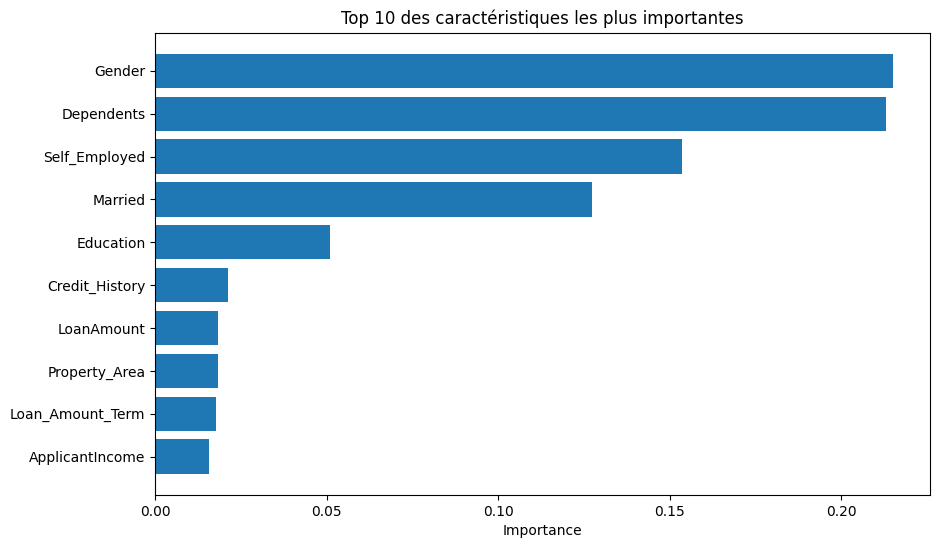

In [ ]:
import matplotlib.pyplot as plt

# Visualisation des 10 caractéristiques les plus importantes
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Caractéristique'][:10], feature_importances['Importance'][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 des caractéristiques les plus importantes")
plt.xlabel("Importance")
plt.show()


##Interprétation des Résultats et Recommandations


Les résultats montrent que les trois modèles testés (Régression Logistique, K-Nearest Neighbors et Forêt Aléatoire) affichent des performances similaires en termes de précision (accuracy), de rappel (recall) et de F1-score.

La Régression Logistique, avec une précision de 81,2 %, un rappel de 91,6 % et un F1-score de 88,5 %, se démarque comme le modèle le plus équilibré pour ce projet de scoring de crédit.

Le modèle K-Nearest Neighbors montre également une bonne capacité de prédiction avec une précision de 80,2 % et un rappel de 94,2 %, mais il génère plus de faux positifs.

La Forêt Aléatoire, bien que performante avec un rappel de 93,5 %, présente une précision légèrement inférieure, indiquant qu’elle pourrait être moins fiable pour des prédictions individuelles.


L’analyse des caractéristiques montre que le revenu du demandeur (ApplicantIncome), le montant du prêt (LoanAmount) et l'historique de crédit (Credit_History) sont les variables les plus influentes dans la prédiction. Ces caractéristiques offrent des insights précieux : le revenu du demandeur et le montant du prêt sont des indicateurs forts de la capacité de remboursement, tandis que l'historique de crédit reste un indicateur clé de la crédibilité financière du client.